# Stock Price Prediction

In [168]:
# importing required libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Fetching data from the web using "Alpha Vantage API"

##### How Alpha Vantage API works: 
https://www.alphavantage.co/documentation/

In [122]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey=demo'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'IBM', '3. Last Refreshed': '2024-01-09', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2024-01-09': {'1. open': '160.0000', '2. high': '160.4837', '3. low': '159.5100', '4. close': '160.0800', '5. volume': '2617186'}, '2024-01-08': {'1. open': '158.6900', '2. high': '161.2160', '3. low': '157.8850', '4. close': '161.1400', '5. volume': '3321698'}, '2024-01-05': {'1. open': '159.9100', '2. high': '160.5500', '3. low': '158.6700', '4. close': '159.1600', '5. volume': '3698961'}, '2024-01-04': {'1. open': '160.2200', '2. high': '161.8100', '3. low': '160.1700', '4. close': '160.8600', '5. volume': '3212004'}, '2024-01-03': {'1. open': '161.0000', '2. high': '161.7300', '3. low': '160.0800', '4. close': '160.1000', '5. volume': '4086065'}, '2024-01-02': {'1. open': '162.8300', '2. high': '163.2900', '3. low': '160.4600', '4. close': '161.5000', '5. vo

In [123]:
data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [124]:
## Meta data for the related data
data['Meta Data']

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'IBM',
 '3. Last Refreshed': '2024-01-09',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [125]:
data["Time Series (Daily)"]

{'2024-01-09': {'1. open': '160.0000',
  '2. high': '160.4837',
  '3. low': '159.5100',
  '4. close': '160.0800',
  '5. volume': '2617186'},
 '2024-01-08': {'1. open': '158.6900',
  '2. high': '161.2160',
  '3. low': '157.8850',
  '4. close': '161.1400',
  '5. volume': '3321698'},
 '2024-01-05': {'1. open': '159.9100',
  '2. high': '160.5500',
  '3. low': '158.6700',
  '4. close': '159.1600',
  '5. volume': '3698961'},
 '2024-01-04': {'1. open': '160.2200',
  '2. high': '161.8100',
  '3. low': '160.1700',
  '4. close': '160.8600',
  '5. volume': '3212004'},
 '2024-01-03': {'1. open': '161.0000',
  '2. high': '161.7300',
  '3. low': '160.0800',
  '4. close': '160.1000',
  '5. volume': '4086065'},
 '2024-01-02': {'1. open': '162.8300',
  '2. high': '163.2900',
  '3. low': '160.4600',
  '4. close': '161.5000',
  '5. volume': '3825044'},
 '2023-12-29': {'1. open': '163.7500',
  '2. high': '164.1800',
  '3. low': '162.8300',
  '4. close': '163.5500',
  '5. volume': '2526169'},
 '2023-12-28'

In [190]:
df_raw = pd.DataFrame.from_dict(data['Time Series (Daily)'])
df = df_raw.transpose()

In [191]:
df = df.rename_axis("date").reset_index()

In [192]:
df.head()

Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


,date,1. open,2. high,3. low,4. close,5. volume
0,2024-01-09,160.0000,160.4837,159.5100,160.0800,2617186
1,2024-01-08,158.6900,161.2160,157.8850,161.1400,3321698
2,2024-01-05,159.9100,160.5500,158.6700,159.1600,3698961
3,2024-01-04,160.2200,161.8100,160.1700,160.8600,3212004
4,2024-01-03,161.0000,161.7300,160.0800,160.1000,4086065


In [193]:
new_col = {}
for i in range(len(df.columns)):
    new_col[df.columns[i]] = df.columns[i].split(" ")[-1].capitalize()

df = df.rename(columns=new_col)

In [194]:
df

,Date,Open,High,Low,Close,Volume
0,2024-01-09,160.0000,160.4837,159.5100,160.0800,2617186
1,2024-01-08,158.6900,161.2160,157.8850,161.1400,3321698
2,2024-01-05,159.9100,160.5500,158.6700,159.1600,3698961
3,2024-01-04,160.2200,161.8100,160.1700,160.8600,3212004
4,2024-01-03,161.0000,161.7300,160.0800,160.1000,4086065
...,...,...,...,...,...,...
6081,1999-11-05,92.7500,92.9400,90.1900,90.2500,13737600
6082,1999-11-04,94.4400,94.4400,90.0000,91.5600,16697600
6083,1999-11-03,95.8700,95.9400,93.5000,94.3700,10369100
6084,1999-11-02,96.7500,96.8100,93.6900,94.8100,11105400


In [195]:
print("First 5 records \n",df.head())
print("")
print("Last 5 records \n",df.tail())

First 5 records 
          Date      Open      High       Low     Close   Volume
0  2024-01-09  160.0000  160.4837  159.5100  160.0800  2617186
1  2024-01-08  158.6900  161.2160  157.8850  161.1400  3321698
2  2024-01-05  159.9100  160.5500  158.6700  159.1600  3698961
3  2024-01-04  160.2200  161.8100  160.1700  160.8600  3212004
4  2024-01-03  161.0000  161.7300  160.0800  160.1000  4086065

Last 5 records 
             Date     Open     High      Low    Close    Volume
6081  1999-11-05  92.7500  92.9400  90.1900  90.2500  13737600
6082  1999-11-04  94.4400  94.4400  90.0000  91.5600  16697600
6083  1999-11-03  95.8700  95.9400  93.5000  94.3700  10369100
6084  1999-11-02  96.7500  96.8100  93.6900  94.8100  11105400
6085  1999-11-01  98.5000  98.8100  96.3700  96.7500   9551800


In [202]:
## shape --> (records, fields) / (rows, columns)
df.shape

(6086, 6)

In [205]:
## column Names
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [206]:
## Columns/Field datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6086 entries, 0 to 6085
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    6086 non-null   object
 1   Open    6086 non-null   object
 2   High    6086 non-null   object
 3   Low     6086 non-null   object
 4   Close   6086 non-null   object
 5   Volume  6086 non-null   object
dtypes: object(6)
memory usage: 285.4+ KB


In [216]:
df['Date'] = pd.to_datetime(df["Date"])

for col in df.columns:
    if col != "Date":
        df[col] = pd.to_numeric(df[col])

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6086 entries, 0 to 6085
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6086 non-null   datetime64[ns]
 1   Open    6086 non-null   float64       
 2   High    6086 non-null   float64       
 3   Low     6086 non-null   float64       
 4   Close   6086 non-null   float64       
 5   Volume  6086 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 285.4 KB


In [229]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

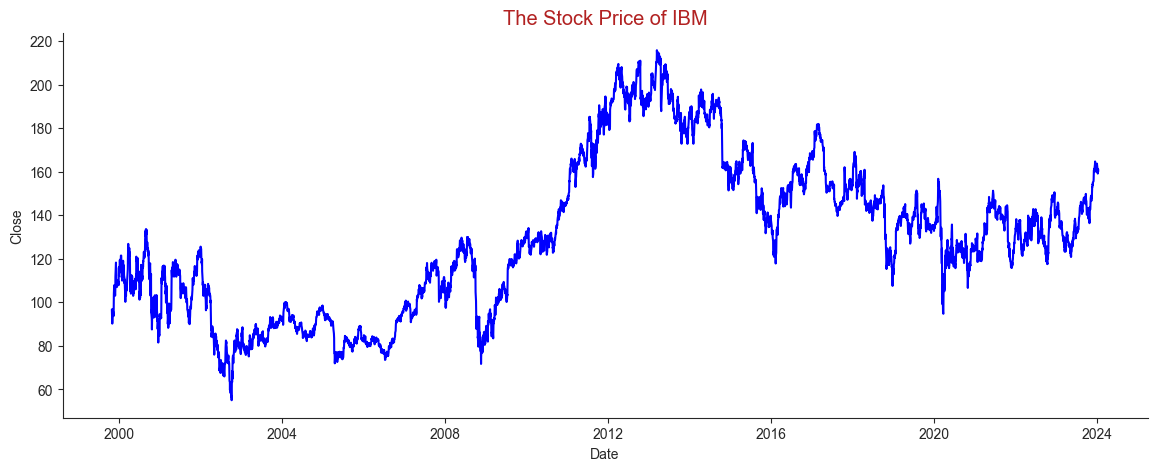

In [242]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
plt.title("The Stock Price of IBM",size='x-large',color='firebrick')
sns.lineplot(data=df,x="Date",y='Close',color='blue')
sns.despine()
plt.title("The Stock Price of IBM",size='x-large',color='firebrick')
plt.show()

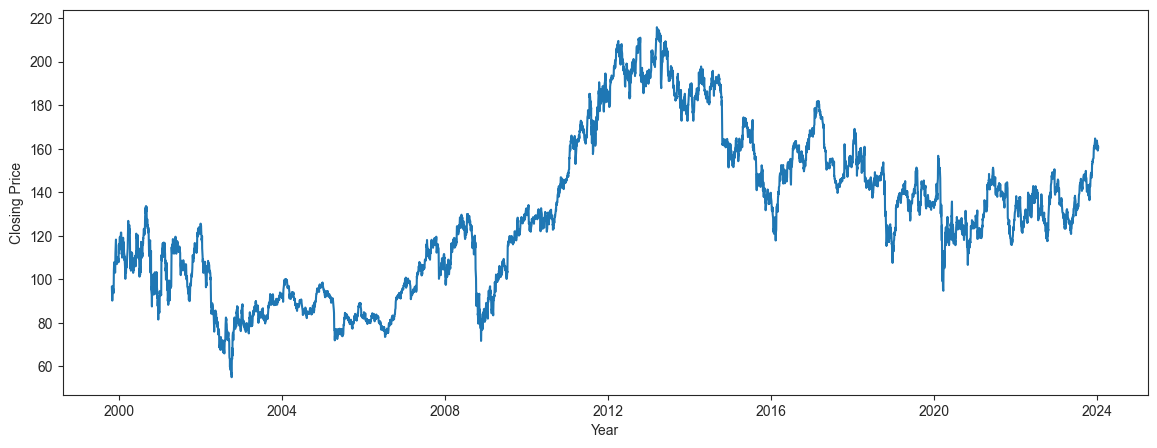

In [244]:
# using Only matplotlib to plot the IBM stock price graph

plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["Close"], label="IBM")
plt.ylabel("Closing Price")
plt.xlabel("Year")

# plt.legend(fontsize=12)
plt.show()

In [259]:
## Eporting DataFrame as Pickle file
pd.to_pickle(df,"./IBMstockPrice_demo.pkl")

In [260]:
# Reading Pickle Dataframe
demo_Pickle_df = pd.read_pickle("IBMstockPrice_demo.pkl")

In [262]:
## Exporting DataFrame as CSV file
df[::-1].to_csv("./data/IBMStockPrice.csv", index=False)